In [0]:
#Import libraries
import numpy as np
np.random.seed(42)
import pandas as pd
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import cv2
from google.colab.patches import cv2_imshow

In [0]:
#Mount to google drive for easy access to files for import/export
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
xTrainEmotionExtraData = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/xTrainEmotionExtraData.npy')
yTrainEmotionExtraData = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/yTrainEmotionExtraData.npy')
xTestEmotionExtraData = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/xTestEmotion.npy')
yTestEmotionExtraData = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/yTestEmotion.npy')

In [0]:
yTestEmotionExtraDataP = pd.DataFrame(yTestEmotionExtraData).idxmax(axis=1)
emotions = ['happy','normal','sad/angry/disgusted','surprised/fearful']

In [0]:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label') 

Load top models identified by Hyperas optimisation and check confusion matrix for each. Try to ensemble models which are good at predicting different emotion classes e.g. best model identified had poor accuracy when classifying sd/sr emotions, can find other models which might be better at detecting these emotions.

In [0]:
model1 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion15.h5')
test1 = model1.evaluate(xTestEmotionExtraData, yTestEmotionExtraData, verbose=0)
print('Test loss:', test1[0])
print('Test accuracy:', test1[1])

Test loss: 0.7887388915318587
Test accuracy: 0.7250830562803833


In [0]:
predictions1 = model1.predict_classes(xTestEmotionExtraData, verbose=0)
predProbs1 = model1.predict(xTestEmotionExtraData, verbose=0)

Normalized confusion matrix


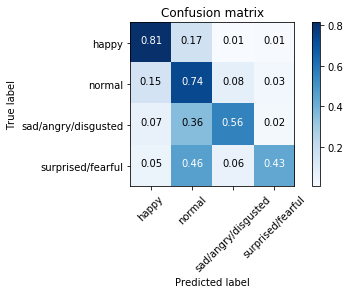

In [0]:
cm1 = confusion_matrix(yTestEmotionExtraDataP, predictions1)
plot_confusion_matrix(cm1,emotions,normalize=True)

In [0]:
model2 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion24.h5')
test2 = model2.evaluate(xTestEmotionExtraData, yTestEmotionExtraData, verbose=0)
print('Test loss:', test2[0])
print('Test accuracy:', test2[1])

Test loss: 0.762969198813074
Test accuracy: 0.7284053154165958


In [0]:
predictions2 = model2.predict_classes(xTestEmotionExtraData, verbose=0)
predProbs2 = model2.predict(xTestEmotionExtraData, verbose=0)

Normalized confusion matrix


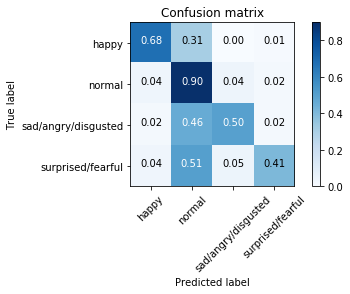

In [0]:
cm2 = confusion_matrix(yTestEmotionExtraDataP, predictions2)
plot_confusion_matrix(cm2,emotions,normalize=True)

In [0]:
model3 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion28.h5')
test3 = model3.evaluate(xTestEmotionExtraData, yTestEmotionExtraData, verbose=0)
print('Test loss:', test3[0])
print('Test accuracy:', test3[1])

Test loss: 0.7798020481271205
Test accuracy: 0.7267441862445337


In [0]:
predictions3 = model3.predict_classes(xTestEmotionExtraData, verbose=0)
predProbs3 = model3.predict(xTestEmotionExtraData, verbose=0)

Normalized confusion matrix


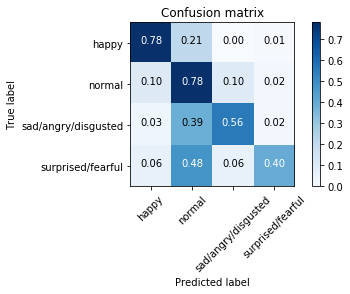

In [0]:
cm3 = confusion_matrix(yTestEmotionExtraDataP, predictions3)
plot_confusion_matrix(cm3,emotions,normalize=True)

In [0]:
model4 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion32.h5')
test4 = model4.evaluate(xTestEmotionExtraData, yTestEmotionExtraData, verbose=0)
print('Test loss:', test4[0])
print('Test accuracy:', test4[1])

Test loss: 0.781904972470876
Test accuracy: 0.7308970099667774


In [0]:
predictions4 = model4.predict_classes(xTestEmotionExtraData, verbose=0)
predProbs4 = model4.predict(xTestEmotionExtraData, verbose=0)

Normalized confusion matrix


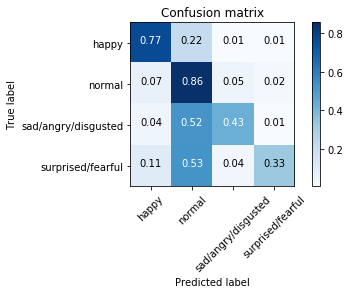

In [0]:
cm4 = confusion_matrix(yTestEmotionExtraDataP, predictions4)
plot_confusion_matrix(cm4,emotions,normalize=True)

In [0]:
model5 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion34.h5')
test5 = model5.evaluate(xTestEmotionExtraData, yTestEmotionExtraData, verbose=0)
print('Test loss:', test5[0])
print('Test accuracy:', test5[1])

Test loss: 0.775253666199719
Test accuracy: 0.7167774088358958


In [0]:
predictions5 = model5.predict_classes(xTestEmotionExtraData, verbose=0)
predProbs5 = model5.predict(xTestEmotionExtraData, verbose=0)

Normalized confusion matrix


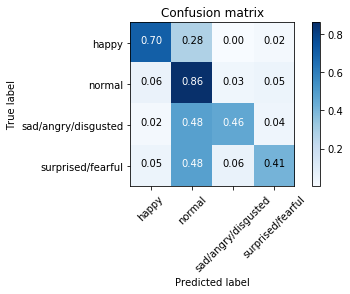

In [0]:
cm5 = confusion_matrix(yTestEmotionExtraDataP, predictions5)
plot_confusion_matrix(cm5,emotions,normalize=True)

In [0]:
model6 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion4.h5')
test6 = model6.evaluate(xTestEmotionExtraData, yTestEmotionExtraData, verbose=0)
print('Test loss:', test6[0])
print('Test accuracy:', test6[1])

Test loss: 0.8061992213179503
Test accuracy: 0.7308970095707332


In [0]:
predictions6 = model6.predict_classes(xTestEmotionExtraData, verbose=0)
predProbs6 = model6.predict(xTestEmotionExtraData, verbose=0)

Normalized confusion matrix


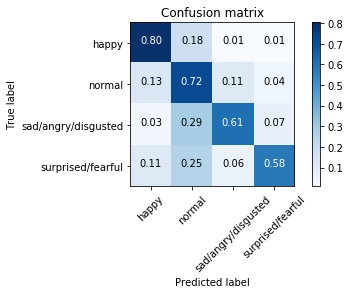

In [0]:
cm6 = confusion_matrix(yTestEmotionExtraDataP, predictions6)
plot_confusion_matrix(cm6,emotions,normalize=True)

In [0]:
model7 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion46.h5')
test7 = model7.evaluate(xTestEmotionExtraData, yTestEmotionExtraData, verbose=0)
print('Test loss:', test7[0])
print('Test accuracy:', test7[1])

Test loss: 0.8425686594061678
Test accuracy: 0.728405316010662


In [0]:
predictions7 = model7.predict_classes(xTestEmotionExtraData, verbose=0)
predProbs7 = model7.predict(xTestEmotionExtraData, verbose=0)

Normalized confusion matrix


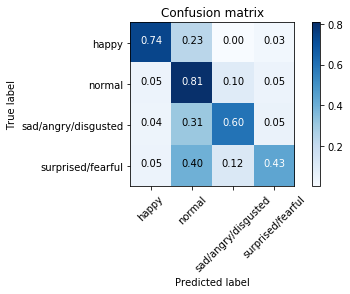

In [0]:
cm7 = confusion_matrix(yTestEmotionExtraDataP, predictions7)
plot_confusion_matrix(cm7,emotions,normalize=True)

Shortlisted models:
- Model 21, Loss = 0.76, Accuracy = 0.73
- Model 4, Loss = 0.81, Accuracy = 0.73
- Model 46, Loss = 0.84, Accuracy = 0.73

In [0]:
model21 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion21.h5')
model4 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion4.h5')
model46 = load_model('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/Hyperas/BatchNormalisation/TestClassWeights/hyperasEmotion46.h5')

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [0]:
def evaluateEnsemble(models, weights, testX, testY):
  predictions = [model.predict(testX) for model in models]
  predictions = np.array(predictions)
  summed = np.tensordot(predictions, weights, axes = ((0),(0)))
  result = np.argmax(summed, axis=1)
  accuracy = accuracy_score(testY, result)
  return accuracy, result, summed

In [0]:
def normalize(weights):
	result = np.linalg.norm(weights, 1)
	if result == 0.0:
		return weights
	return weights / result

In [0]:
def gridSearch(models, testX, testY):
  count = 0
  w = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
  bestScore, bestWeights = 0.0, None
  for weights in itertools.product(w, repeat=len(models)):
    if len(set(weights))==1:
      continue
    weights = normalize(weights)
    score = evaluateEnsemble(models, weights, testX, testY)[0]
    if score > bestScore:
      bestScore, bestWeights = score, weights
      print('>%s %.5f' % (bestWeights, bestScore))
    count+=1
    if count%10==0:
      print('Count:', count)
  return list(bestWeights)

In [0]:
#Try model ensemble using equal weights
weights = [1.0/3 for _ in range(3)]
models = [model21, model4, model46]
score, result = evaluateEnsemble(models, weights, xTestEmotionExtraData, yTestEmotionExtraDataP)
print(score)
print(result)

0.7799003322259136
[1 2 3 ... 1 0 3]


Normalized confusion matrix


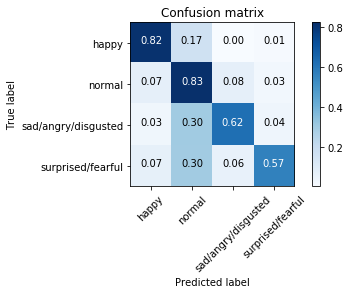

In [0]:
cm = confusion_matrix(yTestEmotionExtraDataP, result)
plot_confusion_matrix(cm,emotions,normalize=True)

In [0]:
#Use gridsearch to compute optimal weights for models used in predictions
bestWeights = gridSearch(models, xTestEmotionExtraData, yTestEmotionExtraDataP)
bestScore, bestResult, bestProbSum = evaluateEnsemble(models, bestWeights, xTestEmotionExtraData, yTestEmotionExtraDataP)
print(bestWeights)
print(bestScore)
print(bestResult)

>[0. 0. 1.] 0.72841
Count: 10
>[0. 1. 0.] 0.73090
>[0.  0.5 0.5] 0.77326
Count: 20
Count: 30
Count: 40
>[0.         0.57142857 0.42857143] 0.77409
Count: 50
>[0.         0.55555556 0.44444444] 0.77575
Count: 60
Count: 70
Count: 80
Count: 90
Count: 100
Count: 110
Count: 120
Count: 130
Count: 140
>[0.2 0.4 0.4] 0.77741
Count: 150
>[0.16666667 0.5        0.33333333] 0.77824
Count: 160
Count: 170
Count: 180
Count: 190
Count: 200
Count: 210
Count: 220
Count: 230
Count: 240
Count: 250
Count: 260
Count: 270
Count: 280
Count: 290
>[0.18181818 0.45454545 0.36363636] 0.77907
Count: 300
Count: 310
Count: 320
Count: 330
Count: 340
>[0.10526316 0.47368421 0.42105263] 0.77990
Count: 350
Count: 360
Count: 370
Count: 380
Count: 390
Count: 400
Count: 410
Count: 420
Count: 430
>[0.21428571 0.42857143 0.35714286] 0.78156
Count: 440
Count: 450
Count: 460
Count: 470
Count: 480
Count: 490
Count: 500
Count: 510
Count: 520
Count: 530
Count: 540
Count: 550
Count: 560
Count: 570
Count: 580
Count: 590
Count: 600

In [0]:
bestWeights = [0.2142857142857143, 0.4285714285714286, 0.35714285714285715]
models = [model21, model4, model46]
bestScore, bestResult, bestProbSum = evaluateEnsemble(models, bestWeights, xTestEmotionExtraData, yTestEmotionExtraDataP)
print(bestScore)
print(bestResult)
print(bestProbSum)

0.78156146179402
[1 2 3 ... 1 0 3]
[[1.54093089e-01 5.74994605e-01 1.25260993e-01 1.45651291e-01]
 [1.45144092e-03 1.44242893e-01 8.48235850e-01 6.06984897e-03]
 [5.58579344e-02 1.07211747e-01 2.65114647e-02 8.10418814e-01]
 ...
 [7.83865476e-02 6.03063605e-01 2.64601170e-01 5.39486911e-02]
 [9.42495508e-01 5.74625428e-02 9.73186741e-06 3.22538561e-05]
 [9.64848000e-02 2.54729568e-01 5.01813897e-02 5.98604213e-01]]


Normalized confusion matrix


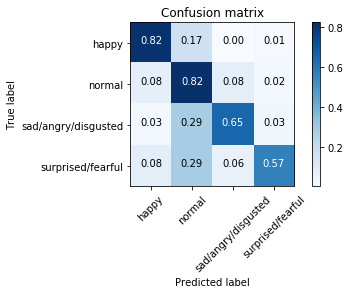

In [0]:
cmGS = confusion_matrix(yTestEmotionExtraDataP, bestResult)
plot_confusion_matrix(cmGS,emotions,normalize=True)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yTestEmotionExtraDataP, bestResult)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yTestEmotionExtraDataP, bestResult, average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yTestEmotionExtraDataP, bestResult, average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yTestEmotionExtraDataP, bestResult, average='macro')
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(yTestEmotionExtraDataP, bestProbSum, multi_class='ovo', average='macro')
print('ROC AUC: %f' % auc)

Accuracy: 0.781561
Precision: 0.750502
Recall: 0.714271
F1 score: 0.729428
ROC AUC: 0.900681


In [0]:
actual = list(yTestEmotionExtraDataP)
print(actual)

[1, 0, 3, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 3, 1, 0, 2, 0, 3, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 3, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 3, 1, 3, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 3, 3, 1, 3, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 3, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 3, 1, 0, 1, 1, 3, 1, 0, 3, 3, 0, 1, 0, 1, 1, 1, 0, 3, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 3, 0, 0, 3, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 3, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 3, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 

In [0]:
#Identify wrongly classified images and group them based on emotions
no = []
hp = []
sd = []
sr = []

for i in range(len(actual)):
  if actual[i]!=bestResult[i]:
    if actual[i]==0:
      hp.append(i)
    elif actual[i]==1:
      no.append(i)
    elif actual[i]==2:
      sd.append(i)
    elif actual[i]==3:
      sr.append(i)
    else:
      print('Error')

print(len(no))
print(len(hp))
print(len(sd))
print(len(sr))

87
88
52
36


In [0]:
indicesTest = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/indicesTest.npy')
imagesCombined = np.load('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/imagesCombined.npy')
targetDf = pd.read_csv('/content/gdrive/My Drive/Google_Collab/CNNModelsEmotion/targetDf.csv')

In [0]:
emotionsDict = {0:'hp',
                1:'no',
                2:'sd',
                3:'sr'}

In [0]:
def checkWronglyClassifiedEmotionsResults(emotionType, index):
  if emotionType == 'no':
      cv2_imshow(imagesCombined[indicesTest[no[index]]])
      print(targetDf.loc[indicesTest[no[index]],'name':'emotionCat'])
      print('Predicted Emotion:',emotionsDict[bestResult[no[index]]])
      print(bestProbSum[no[index]])
  if emotionType == 'hp':
      cv2_imshow(imagesCombined[indicesTest[hp[index]]])
      print(targetDf.loc[indicesTest[hp[index]],'name':'emotionCat'])
      print('Predicted Emotion:',emotionsDict[bestResult[hp[index]]])
      print(bestProbSum[hp[index]])
  if emotionType == 'sd':
      cv2_imshow(imagesCombined[indicesTest[sd[index]]])
      print(targetDf.loc[indicesTest[sd[index]],'name':'emotionCat'])
      print('Predicted Emotion:',emotionsDict[bestResult[sd[index]]])
      print(bestProbSum[sd[index]])
  if emotionType == 'sr':
      cv2_imshow(imagesCombined[indicesTest[sr[index]]])
      print(targetDf.loc[indicesTest[sr[index]],'name':'emotionCat'])
      print('Predicted Emotion:',emotionsDict[bestResult[sr[index]]])
      print(bestProbSum[sr[index]])

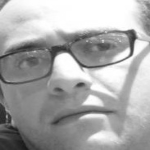

name          KhaS
gender           m
age             35
emotion         sd
emotionCat       2
Name: 3474, dtype: object
Predicted Emotion: no
[0.10623834 0.4575055  0.11356587 0.32269028]


In [0]:
checkWronglyClassifiedEmotionsResults('sd',30)